# DATA PREPARATION

## Step 1 - Loading the Required Libraries and Modules

In [14]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

## Step 2 - Reading the Data and performing Basic Data Checks

In [15]:
df = pd.read_csv('data_cleaning_analysis.csv')
print(df.shape)
df.describe()

(21613, 88)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 - Creating Arrays for the Features and the Response Variable

In [16]:
#Creates an object of the target variable called 'target_column'
target_column = ['price'] 

#Gives us the list of all the features, excluding the target variable 'unemploy'.
predictors = list(set(list(df.columns))-set(target_column))

#Normalizes the predictors. This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.
df[predictors] = df[predictors]/df[predictors].max()

#Displays the summary of the normalized data. We can see that all the independent variables have now been scaled between 0 and 1. The target variable remains unchanged.
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,0.102147,0.264345,0.153612,0.009148,0.426945,0.007542,0.058576,0.681886,0.588990,...,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,3.671272e+05,0.028184,0.096270,0.067832,0.025083,0.154283,0.086517,0.191579,0.130149,0.090420,...,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,7.500000e+04,0.000000,0.000000,0.021418,0.000315,0.285714,0.000000,0.000000,0.200000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,0.090909,0.218750,0.105391,0.003052,0.285714,0.000000,0.000000,0.600000,0.538462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,0.090909,0.281250,0.141064,0.004613,0.428571,0.000000,0.000000,0.600000,0.538462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,0.121212,0.312500,0.188331,0.006472,0.571429,0.000000,0.000000,0.800000,0.615385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4 - Creating the Training and Test Datasets  

### Holdout-validation method: Creation d'un modèle entrainé sur le set d'entraînement et évaluation de sa performance sur le set de test

In [17]:
#Create arrays of the independent (X) and dependent (y) variables, respectively
X = df[predictors].values
y = df[target_column].values


#Splits the data into training and test dataset, with the 'test_size' argument specifying the percentage of data to be kept in the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)

#prints the shape of the training set (19451 observations of 14 variables) and test set (2162 observations of 14 variables)
print(X_train.shape); print(X_test.shape)

(19451, 87)
(2162, 87)


## Step 5 - Build, Predict and Evaluate the Regression Model

#### Implementing the various linear regression models using the scikit-learn library

## Linear Regression

In [18]:
# Instantiate the algorithm 
lr = LinearRegression()

# Fits the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

### Make the predictions

In [19]:
#predicts on the training set
pred_train_lr= lr.predict(X_train)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#predicts on the training set
pred_test_lr= lr.predict(X_test)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

162123.33035318347
0.8078620500014859
148375.46057633517
0.8111334650700581


The above output shows that the RMSE, one of the two evaluation metrics, is 194361 thousand for train data and 180996 thousand for test data. On the other hand, R-squared value is 72 percent for train data and 71.8 percent for test data, which is a good performance. 

## Ridge Regression

In [20]:
rr = Ridge(alpha=0.01)

rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))

print(r2_score(y_train, pred_train_rr))


pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 

print(r2_score(y_test, pred_test_rr))

162185.55618957808
0.8077145297270314
148343.54036448526
0.8112147185510054


The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 975 thousand and 86.7 percent, respectively. For the test data, the result for these metrics is 1017 thousand and 84 percent, respectively.


## Lasso Regression

In [21]:
model_lasso = Lasso(alpha=0.01)

model_lasso.fit(X_train, y_train) 

pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 

print(r2_score(y_test, pred_test_lasso))

162121.759132885
0.8078657741981651
148380.0390521513
0.8111218090428312


/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.758e+13, tolerance: 2.661e+11
  model = cd_fast.enet_coordinate_descent(


The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 971 thousand and 86.7 percent, respectively.

The results for these metrics on the test data is 1019 thousand and 84 percent, respectively. Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero. 

## ElasticNet Regression

In [22]:
model_enet = ElasticNet(alpha = 0.01)

model_enet.fit(X_train, y_train) 

pred_train_enet= model_enet.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))

print(r2_score(y_train, pred_train_enet))


pred_test_enet= model_enet.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))

print(r2_score(y_test, pred_test_enet))

182804.3540817484
0.7557159052830635
165327.78386534544
0.7655109641355038


The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 1352 thousand and 74 percent, respectively. The results for these metrics on the test data is 1379 thousand and 71 percent, respectively. 

## Courbe d'apprentissage

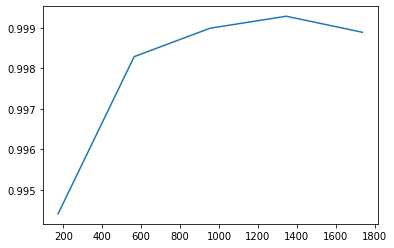

In [30]:
#Avec l'estimator

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

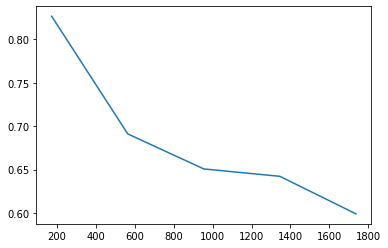

In [31]:
# Avec Ridge Regression (rr)

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rr, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

## Conclusion

In this guide, you have learned about Linear Regression models using the powerful Python library, scikit-learn. You have also learned about Regularization techniques to avoid the shortcomings of the linear regression models. The performance of the models is summarized below:  
 
    Linear Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  

    Ridge Regression Model: Test set RMSE of 1017 thousand and R-square of 84.02 percent.  

    Lasso Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  
    
    ElasticNet Regression Model: Test set RMSE of 1379 thousand and R-square of 70.62 percent.  

The ElasticNet Regression model is performing the worst. All the other regression models are performing better with a decent R-squared and stable RMSE values. The most ideal result would be an RMSE value of zero and R-squared value of 1, but that's almost impossible in real economic datasets.  

There are other iterations that can be done to improve model performance. We have assigned the value of alpha to be 0.01, but this can be altered by hyper parameter tuning to arrive at the optimal alpha value. Cross-validation can also be tried along with feature selection techniques. However, that is not covered in this guide which was aimed at enabling individuals to understand and implement the various Linear Regression models using the scikit-learn library. 